<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/biagiominio/Remote_sensing_2021/blob/main/R_code_time_series.ipynb#scrollTo=WfzIAI-J6TEO">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/biagiominio/Remote_sensing_2021/blob/main/R_code_time_series.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Time series analysis:
> ## Greenland increase of temperature
> *data and code from Emanuela Cosma


## Install R packages
The [install.packages](https://www.rdocumentation.org/packages/utils/versions/3.6.2/topics/install.packages) function is used to download and install packages from CRAN-like repositories.
Define a vector that contains the names of the packages to install, then perform only one function.
 


In [13]:
pk <- c("rgdal", "raster", "rasterVis")
install.packages(pk)

The [library](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/library) function is used to load previously installed packages.
With the [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) function we apply the `library` function to all elements of the vector that contains the package names.

In [ ]:
lapply(pk, library, character.only = TRUE)

Set the current working directory of the R process with the [setwd](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/getwd) function.

In [15]:
setwd("/content")

## Upload file manually
1. Download images of Greenland for the years 2000, 2005, 2010 and 2015. Use the [Land Surface Temperature](https://land.copernicus.eu/global/products/lst) product from the Copernicus program.

2. On the left side of Google Colab click on the small folder icon named file ⇒ click the Upload icon ⇒ choose the files to upload from your "Downloads" folder and click OK. Otherwise, drag your files to Google Colab storage. Now your files are on Google Colab!



## Reading spatial data
To read and view a multilevel object it is common to use the [brick](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/brick) function (RasterBrick object). 
In this case we use the [raster](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/raster) function to read files with a single layer or band (RasterLayer object).

In [18]:
lst_2000 <- raster("lst_2000.tif")
lst_2005 <- raster("lst_2005.tif")
lst_2010 <- raster("lst_2010.tif")
lst_2015 <- raster("lst_2015.tif")

## Visualization of spatial data
Several generic functions have been implemented for "raster" objects to create maps and other plot types. For example, use [plot](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plot) function to create a map of a raster object. Using the [par](https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/par) function it is possible to set the parameters of the graphic output and create a multi frame of images.

In [ ]:
par(mfrow=c(2,2))
plot(lst_2000)
plot(lst_2005)
plot(lst_2010)
plot(lst_2015)

The code above is somewhat redundant. We can use recursive functions like [lapply](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/lapply) to apply a certain function (in this case the `raster` function) to a list of objects (for example our images of Greenland).
Before doing this we create a list containing our images with the [list.files](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/list.files) function.

In [ ]:
rlist <- list.files(pattern="lst")
import <- lapply(rlist, raster)

Now create a multilevel object that has a raster image for each layer or band. The new collection must be a RasterStack object with four bands one for each year. To do this we use the [stack](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/stack) function.

In [ ]:
TGr <- stack(import)
plot(TGr)

Individual bands can also be combined into a single image by assigning individual layers or bands to one of the three color channels (red, green and blue). 
The [plotRGB](https://www.rdocumentation.org/packages/raster/versions/3.4-5/topics/plotRGB) function can be used to make "true (or false) color images" from Landsat and other multi-band satellite images.
In the `plotRGB` function the `stretch` argument increases the contrast of the image through the use of two [methods](http://spatial-analyst.net/ILWIS/htm/ilwisapp/stretch_functionality.htm): "lin" or "hist".


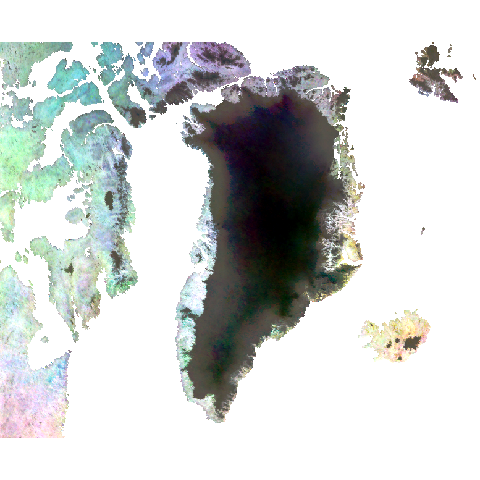

In [ ]:
plotRGB(TGr, r=2, g=3, b=4, stretch="Lin")

In [ ]:
plotRGB(TGr, 1, 2, 3, stretch="Lin")
plotRGB(TGr, 2, 3, 4, stretch="Lin")
plotRGB(TGr, 4, 3, 2, stretch="Lin")
levelplot(TGr)
cl <- colorRampPalette(c("blue","light blue","pink","red"))(100)
levelplot(TGr, col.regions=cl)
levelplot(TGr,col.regions=cl, names.attr=c("July 2000","July 2005", "July 2010", "July 2015"))
levelplot(TGr,col.regions=cl, main="LST variation in time",
names.attr=c("July 2000","July 2005", "July 2010", "July 2015"))

In [ ]:
# Melt
meltlist <- list.files(pattern="melt")
melt_import <- lapply(meltlist,raster)

In [ ]:
melt <- stack(melt_import)
melt

In [ ]:
levelplot(melt)
melt_amount <- melt$X2007annual_melt - melt$X1979annual_melt
clb <- colorRampPalette(c("blue","white","red"))(100)
plot(melt_amount, col=clb)


In [ ]:
levelplot(melt_amount, col.regions=clb)
